# Case study on Supervised learning

Do the following in the iris dataset.

1. Read the dataset to the python environment.

2. Do necessary pre-processing steps.

3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.


In [8]:
data=pd.read_excel('iris.xls')

In [9]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
data.shape

(150, 5)

In [12]:
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [13]:
for i in['SL','SW','PL']:data[i]=data[i].fillna(data[i].mean())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [16]:
data=pd.get_dummies(data)

In [17]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.100000,3.5,1.4,0.2,1,0,0
1,4.900000,3.0,1.4,0.2,1,0,0
2,5.855944,3.2,1.3,0.2,1,0,0
3,4.600000,3.1,1.5,0.2,1,0,0
4,5.000000,3.6,1.4,0.2,1,0,0


In [18]:
data['Classification_Iris-setosa']=data['Classification_Iris-setosa'].astype(float)
data['Classification_Iris-versicolor']=data['Classification_Iris-versicolor'].astype(float)
data['Classification_Iris-virginica']=data['Classification_Iris-virginica'].astype(float)

In [19]:
data.isna().sum()

SL                                0
SW                                0
PL                                0
PW                                0
Classification_Iris-setosa        0
Classification_Iris-versicolor    0
Classification_Iris-virginica     0
dtype: int64

In [20]:
data.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,0.333333,0.333333,0.333333
std,0.808480,0.421884,1.725479,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.275000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'box plot of SL')

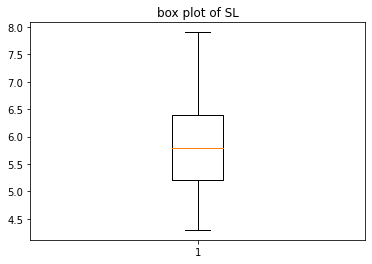

In [21]:
plt.boxplot(data['SL'])
plt.title('box plot of SL')

Text(0.5, 1.0, 'box plot of SL')

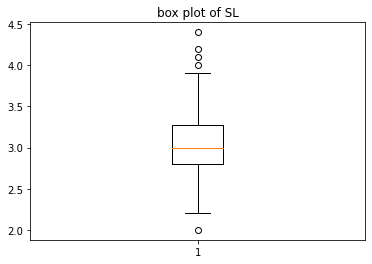

In [22]:
plt.boxplot(data['SW'])
plt.title('box plot of SL')

In [23]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [24]:
IQR=Q3-Q1

In [25]:
LOW_LIM=Q1-1.5*IQR
UP_LIM=Q3+1.5*IQR

In [26]:
OUTLIER=[]
for x in data['SW']:
    if((x>UP_LIM) or (x<LOW_LIM)):
        OUTLIER.append(x)

In [27]:
OUTLIER

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
ind1=data['SW']>UP_LIM
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [29]:
ind1=data['SW']<LOW_LIM
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [30]:
data.drop([14, 15, 32, 33,60],inplace=True)

Text(0.5, 1.0, 'box plot of PL')

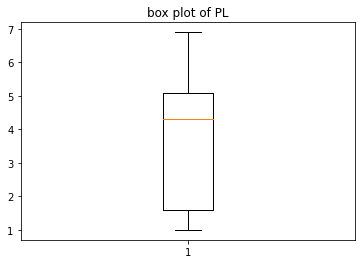

In [31]:
plt.boxplot(data['PL'])
plt.title('box plot of PL')

Text(0.5, 1.0, 'box plot of PW')

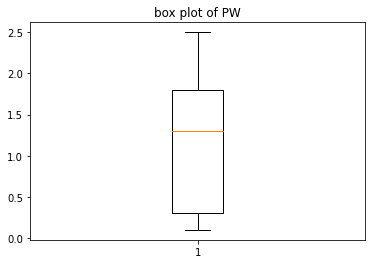

In [32]:
plt.boxplot(data['PW'])
plt.title('box plot of PW')

# 2.Do necessary pre-processing steps.

<AxesSubplot:>

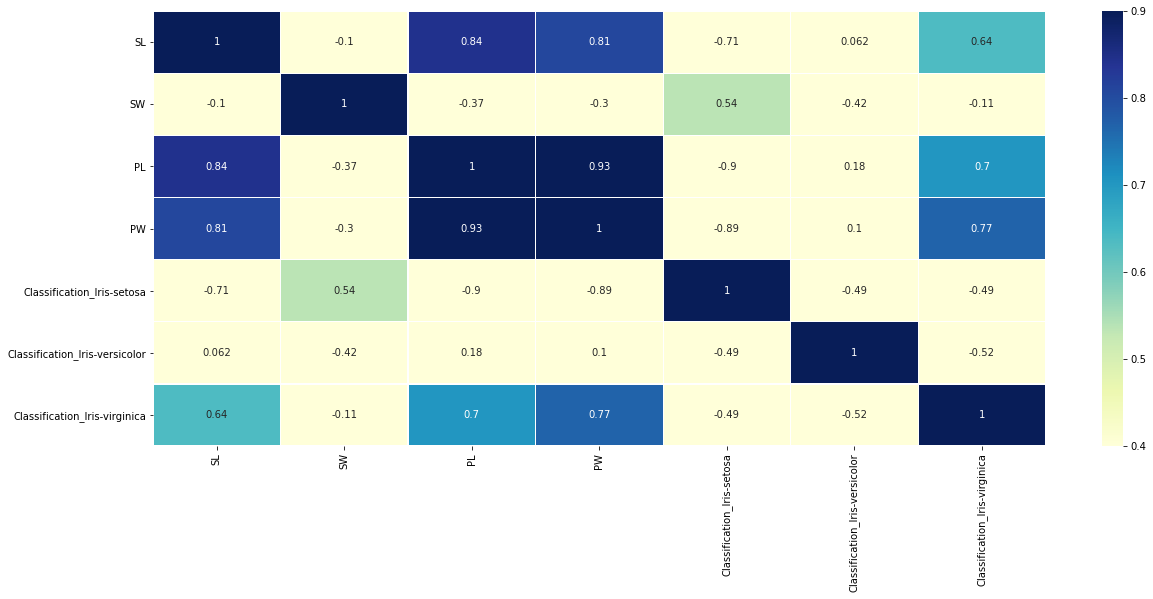

In [33]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [34]:
y=data['Classification_Iris-virginica']
X=data.drop(['Classification_Iris-virginica'],axis=1)

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [36]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 1.9381496378274858e-31


In [38]:
X.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.823017,1.226897,0.317241,0.337931
std,0.816690,0.374355,1.709115,0.758219,0.467015,0.474644
min,4.300000,2.200000,1.000000,0.100000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.855944,3.000000,4.300000,1.300000,0.000000,0.000000
75%,6.400000,3.200000,5.100000,1.800000,1.000000,1.000000
max,7.900000,3.900000,6.900000,2.500000,1.000000,1.000000


In [39]:
type(X)

pandas.core.frame.DataFrame

In [40]:
from sklearn import preprocessing

In [41]:
standardisation =preprocessing.StandardScaler()
X=standardisation.fit_transform(X)

In [42]:
X=pd.DataFrame(X)

In [43]:
X.describe()

,0,1,2,3,4,5
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,7.366713e-16,-2.558298e-16,-4.609340e-16,-5.206563e-17,5.313757e-16,-3.522087e-17
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.929409e+00,-2.212740e+00,-1.657467e+00,-1.491392e+00,-6.816498e-01,-7.144345e-01
25%,-8.235806e-01,-6.044268e-01,-1.305192e+00,-1.226702e+00,-6.816498e-01,-7.144345e-01
50%,-1.762310e-02,-6.832248e-02,2.800491e-01,9.674884e-02,-6.816498e-01,-7.144345e-01
75%,6.508576e-01,4.677818e-01,7.497501e-01,7.584744e-01,1.467029e+00,1.399708e+00
max,2.493905e+00,2.344147e+00,1.806577e+00,1.684890e+00,1.467029e+00,1.399708e+00


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))


MSE is 4.303457255044582e-32


In [45]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [47]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [48]:
print('precsion is:',precision_score(y_test,y_pred))

precsion is: 1.0


In [49]:
print('Recall is:',recall_score(y_test,y_pred))

Recall is: 1.0


In [50]:
print('F1 scroe is:',f1_score(y_test,y_pred))

F1 scroe is: 1.0


In [51]:
confusion_matrix(y_test,y_pred)

array([[18,  0],
       [ 0, 11]], dtype=int64)

Logistic Regression gives accuracy value of 1.0 so there is no need other supervision model techinique

# Randomforest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier 

In [62]:
randomfr= RandomForestClassifier(random_state = 42)

In [63]:
randomfr.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred=randomfr.predict(X_test)

In [65]:
y_pred


array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [66]:
accuracy_score(y_test,y_pred)


0.9655172413793104

In [67]:
confusion_matrix(y_test,y_pred)

array([[18,  0],
       [ 1, 10]], dtype=int64)

Randomforest Classifer also gives good accuracy score
 So It is also good for this data set